### Exercici 1
#### Parteix el conjunt de dades DelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import statistics #library for statistics
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
df_flight = pd.read_csv('DelayedFlights.csv', index_col=0) 
#lee el fichero CSV y asigna el índice a la columna 0

In [3]:
#we split the dataset into train and test sets at 50%
#seed for random generator = 1
train, test = train_test_split(df_flight, test_size=0.4, random_state=1)

In [4]:
#descriptive study about train dataset
print('\nMain info of the train dataset:')
print(train.info())
print('\nA sample of the first rows of train dataset:')
print(train.head())
print('\nDescription for each column (only numerical values):')
print(train.describe().T.astype(int))
print('\nDescription of null values for each column:')
print(train.isna().sum())




Main info of the train dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162054 entries, 2093215 to 414451
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1162054 non-null  int64  
 1   Month              1162054 non-null  int64  
 2   DayofMonth         1162054 non-null  int64  
 3   DayOfWeek          1162054 non-null  int64  
 4   DepTime            1162054 non-null  float64
 5   CRSDepTime         1162054 non-null  int64  
 6   ArrTime            1157794 non-null  float64
 7   CRSArrTime         1162054 non-null  int64  
 8   UniqueCarrier      1162054 non-null  object 
 9   FlightNum          1162054 non-null  int64  
 10  TailNum            1162051 non-null  object 
 11  ActualElapsedTime  1157026 non-null  float64
 12  CRSElapsedTime     1161933 non-null  float64
 13  AirTime            1157026 non-null  float64
 14  ArrDelay           1157026 non-null  float64

In [5]:
#descriptive study about test dataset
print('\nMain info of the test dataset:')
print(test.info())
print('\nA sample of the first rows of test dataset:')
print(test.head())
print('\nDescription for each column (only numerical values):')
print(test.describe().T.astype(int))
print('\nDescription of null values for each column:')
print(test.isna().sum())


Main info of the test dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 774704 entries, 6516830 to 3769128
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               774704 non-null  int64  
 1   Month              774704 non-null  int64  
 2   DayofMonth         774704 non-null  int64  
 3   DayOfWeek          774704 non-null  int64  
 4   DepTime            774704 non-null  float64
 5   CRSDepTime         774704 non-null  int64  
 6   ArrTime            771854 non-null  float64
 7   CRSArrTime         774704 non-null  int64  
 8   UniqueCarrier      774704 non-null  object 
 9   FlightNum          774704 non-null  int64  
 10  TailNum            774702 non-null  object 
 11  ActualElapsedTime  771345 non-null  float64
 12  CRSElapsedTime     774627 non-null  float64
 13  AirTime            771345 non-null  float64
 14  ArrDelay           771345 non-null  float64
 15  DepDelay    

### Exercici 2
#### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [6]:
#STANDARIZE DATA
from sklearn.preprocessing import StandardScaler

#we apply the StandardScaler function to a numeric atribute 
#like ArrDelay and DepDelay

#removing nan data for columns that we will use
df_flight_delay = df_flight[['ArrDelay','DepDelay']].dropna()

#initializing the Scaler
scaler = StandardScaler()
#the fit method compute the mean and std
#the transform method performs standardization by centering and scaling
array_flight_trans = scaler.fit_transform(df_flight_delay[['ArrDelay','DepDelay']])

#it returns data transformed as a numpy array
print('Data standarized:')
print(array_flight_trans,'\n')

Data standarized:
[[-0.98970118 -0.65880113]
 [-0.70793514 -0.45229036]
 [-0.49661061 -0.65880113]
 ...
 [ 1.00027146  0.69290571]
 [-0.5846625  -0.60248001]
 [-0.83120778 -0.67757484]] 



In [7]:
#DUMMY COLUMNS
#we are going to apply dummy variables for the categorical atribute 'Unique Carrier'
#applying value counts to know how many of each are
print('Before aplying Dummy variables we have:','\n')
print('For atribute Unique Carrier:')
print(df_flight['UniqueCarrier'].value_counts(),'\n')

#now we apply the get_dummies method
df_flight_dummyUC = pd.get_dummies(df_flight['UniqueCarrier'])
print('After aplying Dummy variables we have:','\n')
print(df_flight_dummyUC)


Before aplying Dummy variables we have: 

For atribute Unique Carrier:
WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64 

After aplying Dummy variables we have: 

         9E  AA  AQ  AS  B6  CO  DL  EV  F9  FL  HA  MQ  NW  OH  OO  UA  US  \
0         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
7009710   0   0   0   0   0   0   1   0

### Exercici 3
#### Resumeix les noves columnes generades de manera estadística i gràfica.


Mean for Arribal Delay and Departure Delay:
-2.7296099072796793e-17
4.1445264898868565e-17

Std deviation for for Arribal Delay and Departure Delay:
0.9999999999999998
1.0

Quantile 75% for Arribal Delay and Departure Delay:
0.24302523613261132
0.18601564552535232


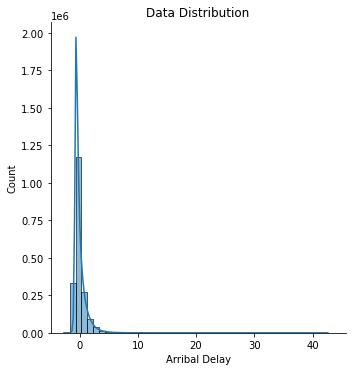

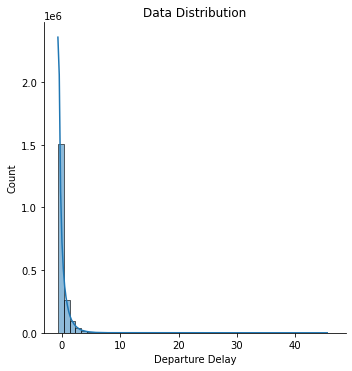

In [8]:
#summary of new columns graphical and statistical from STANDARIZE DATA
#we convert to a list
ArrDelay_trans = array_flight_trans[:,0]
DepDelay_trans = array_flight_trans[:,1]

print('\nMean for Arribal Delay and Departure Delay:')
print(np.mean(ArrDelay_trans))
print(np.mean(DepDelay_trans))

print('\nStd deviation for for Arribal Delay and Departure Delay:')
print(np.var(ArrDelay_trans))
print(np.var(DepDelay_trans))

print('\nQuantile 75% for Arribal Delay and Departure Delay:')
print(np.quantile(ArrDelay_trans, 0.75))
print(np.quantile(DepDelay_trans, 0.75))

fig1 = sns.displot(data=ArrDelay_trans, kde=True, binwidth=1)
fig1.set(title='Data Distribution', xlabel='Arribal Delay', ylabel='Count')

fig2 = sns.displot(data=DepDelay_trans, kde=True, binwidth=1)
fig2.set(title='Data Distribution', xlabel='Departure Delay', ylabel='Count')

In [18]:
#summary of new columns graphical and statistical from DUMMY DATA
#dummy variables are only 0 and 1, there is no meaning to represent graphical or numerical
print(df_flight_dummyUC.describe().T.astype(int))



      count  mean  std  min  25%  50%  75%  max
9E  1936758     0    0    0    0    0    0    1
AA  1936758     0    0    0    0    0    0    1
AQ  1936758     0    0    0    0    0    0    1
AS  1936758     0    0    0    0    0    0    1
B6  1936758     0    0    0    0    0    0    1
CO  1936758     0    0    0    0    0    0    1
DL  1936758     0    0    0    0    0    0    1
EV  1936758     0    0    0    0    0    0    1
F9  1936758     0    0    0    0    0    0    1
FL  1936758     0    0    0    0    0    0    1
HA  1936758     0    0    0    0    0    0    1
MQ  1936758     0    0    0    0    0    0    1
NW  1936758     0    0    0    0    0    0    1
OH  1936758     0    0    0    0    0    0    1
OO  1936758     0    0    0    0    0    0    1
UA  1936758     0    0    0    0    0    0    1
US  1936758     0    0    0    0    0    0    1
WN  1936758     0    0    0    0    0    0    1
XE  1936758     0    0    0    0    0    0    1
YV  1936758     0    0    0    0    0   